# Author
#     Lop: DHCNTT17A
#     MSSV: 22003185
#     Ho ten: Nguyen Hoang Nguyen Vu

# Đọc dữ liệu lên dataframe

In [2]:
import pandas as pd 

thietbi = pd.read_csv('thietbi.csv')
thietbi.head(10)

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


In [3]:
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')

In [4]:
nguoidung_thietbi.head(10)

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1
5,22787,12921,android,4.3,GT-I9505,1
6,22788,28714,android,6.0,SM-G930F,1
7,22789,28714,android,6.0,SM-G930F,1
8,22790,29592,android,5.1,D2303,1
9,22791,28775,ios,10.2,"iPhone6,2",3


In [5]:
nguoidung_sudung.head(10)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792
5,71.59,79.26,1557.33,22793
6,71.59,79.26,519.12,22794
7,71.59,79.26,519.12,22795
8,30.92,22.77,3114.67,22799
9,69.80,14.70,25955.55,22801


# 2.  Vẽ mô hình quan hệ (ERD) từ bảng dữ liệu trên

In [8]:
# 3.  Đổi tên các cột dữ liệu cần thiết
thietbi.rename(columns={'Retail Branding': 'Branding', 'Marketing Name': 'MarketingName'}, inplace=True)
thietbi.head(10)

,Branding,MarketingName,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


In [9]:
# 4.  Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng 
# kết quả có các cột sau: [outgoing_mins_per_month, outgoing_sms_per_month, 
# monthly_mb, use_id, platform, device] 

nguoidung_sudung_thietbi = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id', 'platform', 'device']], how='inner', on='use_id')
nguoidung_sudung_thietbi.head(10)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
5,71.59,79.26,1557.33,22793,android,SM-G361F
6,71.59,79.26,519.12,22794,android,SM-G361F
7,71.59,79.26,519.12,22795,android,SM-G361F
8,30.92,22.77,3114.67,22799,android,ONEPLUS A3003
9,69.80,14.70,25955.55,22801,android,GT-I9505


In [10]:
thietbi.head(5)

,Branding,MarketingName,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [11]:
nguoidung_sudung_thietbi = pd.merge(nguoidung_sudung_thietbi, thietbi[['Branding', 'Model']], left_on='device', right_on='Model')
nguoidung_sudung_thietbi.head(10)


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505
5,125.32,38.53,3114.67,22888,android,GT-I9505,Samsung,GT-I9505
6,143.81,79.38,9005.49,22908,android,GT-I9505,Samsung,GT-I9505
7,61.43,125.51,519.12,22942,android,GT-I9505,Samsung,GT-I9505
8,302.11,83.14,1557.33,22965,android,GT-I9505,Samsung,GT-I9505
9,360.86,103.92,3114.67,22977,android,GT-I9505,Samsung,GT-I9505


In [12]:
nguoidung_sudung_thietbi[nguoidung_sudung_thietbi.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


In [19]:
nguoidung_sudung_thietbi.groupby('Branding').agg({'outgoing_mins_per_month': 'mean',
    'outgoing_sms_per_month': 'mean',
    'monthly_mb': 'mean',
    'use_id': 'count'})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


In [14]:
# 8.  Trực quan số lượng người dùng các nhãn hàng
import seaborn as sns
import matplotlib.pyplot as plt

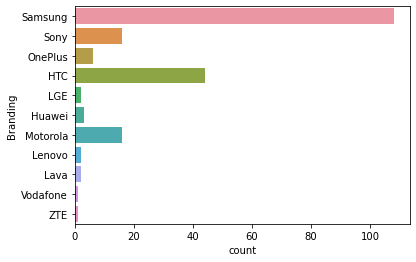

In [15]:
sns.countplot(y='Branding', data=nguoidung_sudung_thietbi)
plt.show()

In [16]:
import numpy as np

In [23]:

mean_nd_sd_tb = nguoidung_sudung_thietbi.groupby('Branding').agg({'outgoing_mins_per_month': 'mean',
    'outgoing_sms_per_month': 'mean',
    'monthly_mb': 'mean',
    'use_id': 'count'})
mean_nd_sd_tb

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


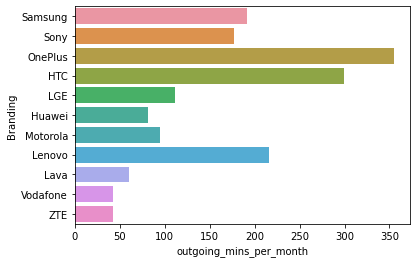

In [28]:
# 9.  Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên 
# từng nhóm nhãn hàng bán lẻ 
sns.barplot(x='outgoing_mins_per_month', y='Branding', data=nguoidung_sudung_thietbi, ci=None)
plt.show()

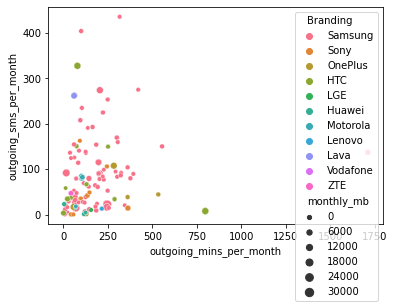

In [36]:
# 10. Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng
sns.scatterplot(y='outgoing_sms_per_month', x='outgoing_mins_per_month', 
                hue='Branding', size='monthly_mb', data=nguoidung_sudung_thietbi)
plt.show()

In [38]:
import scipy.stats as stats

In [41]:
# 11.  Hãy kiểm định xem trung bình outgoing_mins_per_month có bằng 200 phút
grouped_data = [nguoidung_sudung_thietbi[nguoidung_sudung_thietbi['Branding'] == brand]['outgoing_mins_per_month'] for brand in nguoidung_sudung_thietbi['Branding'].unique()]

# Thực hiện kiểm định ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)

print(f"Giá trị F: {f_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết không (H0). Có sự khác biệt đáng kể về trung bình outgoing_mins_per_month giữa các nhóm Branding.")
else:
    print("Không bác bỏ giả thuyết không (H0). Không có sự khác biệt đáng kể về trung bình outgoing_mins_per_month giữa các nhóm Branding.")

Giá trị F: 1.742704186677582
P-value: 0.07391797702125848
Không bác bỏ giả thuyết không (H0). Không có sự khác biệt đáng kể về trung bình outgoing_mins_per_month giữa các nhóm Branding.


In [47]:
# 12.  Hãy kiểm định xem trung bình outgoing_sms_per_month có bằng 100 tin nhắn
t_stat, p_value = stats.ttest_1samp(nguoidung_sudung_thietbi['outgoing_sms_per_month'], 100)

# In kết quả
print(f"Giá trị t: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết không (H0). Trung bình outgoing_sms_per_month khác 100 tin nhắn.")
else:
    print("Không bác bỏ giả thuyết không (H0). Trung bình outgoing_sms_per_month không khác 100 tin nhắn.")

Giá trị t: -2.9567085781961246
P-value: 0.0034834938502051878
Bác bỏ giả thuyết không (H0). Trung bình outgoing_sms_per_month khác 100 tin nhắn.


In [48]:
# 13.  Hãy kiểm định xem trung bình monthly_mb có bằng 2048 mb
t_stat, p_value = stats.ttest_1samp(nguoidung_sudung_thietbi['monthly_mb'], 2048)

print(f"Giá trị t: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết không (H0). Trung bình monthly_mb khác 2048 MB.")
else:
    print("Không bác bỏ giả thuyết không (H0). Trung bình monthly_mb không khác 2048 MB.")

Giá trị t: 5.918078326415772
P-value: 1.3950238813156428e-08
Bác bỏ giả thuyết không (H0). Trung bình monthly_mb khác 2048 MB.


In [50]:
# 14.  Hãy tạo ma trận tương quan giữa [outgoing_mins_per_month, outgoing_sms_per_month, 
# monthly_mb] và sắp xếp tăng dần về mức độ tương quan

correlation_matrix = nguoidung_sudung_thietbi[['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']].corr()
sorted_correlation = correlation_matrix.unstack().sort_values(ascending=True)
print(sorted_correlation)

outgoing_sms_per_month   monthly_mb                -0.046049
monthly_mb               outgoing_sms_per_month    -0.046049
outgoing_mins_per_month  outgoing_sms_per_month    -0.016494
outgoing_sms_per_month   outgoing_mins_per_month   -0.016494
outgoing_mins_per_month  monthly_mb                 0.213489
monthly_mb               outgoing_mins_per_month    0.213489
outgoing_mins_per_month  outgoing_mins_per_month    1.000000
outgoing_sms_per_month   outgoing_sms_per_month     1.000000
monthly_mb               monthly_mb                 1.000000
dtype: float64


In [51]:
# 15.  Kiểm định xem outgoing_mins_per_month, outgoing_sms_per_month có tương quan
corr_stat, p_value = stats.pearsonr(nguoidung_sudung_thietbi['outgoing_mins_per_month'], nguoidung_sudung_thietbi['outgoing_sms_per_month'])

print(f"Giá trị Pearson correlation: {corr_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Có sự tương quan đáng kể giữa outgoing_mins_per_month và outgoing_sms_per_month.")
else:
    print("Không có sự tương quan đáng kể giữa outgoing_mins_per_month và outgoing_sms_per_month.")

Giá trị Pearson correlation: -0.016494441685319394
P-value: 0.8162223636414832
Không có sự tương quan đáng kể giữa outgoing_mins_per_month và outgoing_sms_per_month.


In [53]:
from scipy.stats import chi2_contingency

In [56]:
# 16.  Hãy kiểm định xem có mối quan hệ nào giữa platform và branding


platform_branding = pd.crosstab(nguoidung_sudung_thietbi['platform'], nguoidung_sudung_thietbi['Branding'])

chi2_stat, p_value, dof, expected = chi2_contingency(platform_branding)

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Có mối quan hệ giữa platform và branding.")
else:
    print("Không có mối quan hệ giữa platform và branding.")

Chi-square statistic: 0.0
P-value: 1.0
Không có mối quan hệ giữa platform và branding.


In [59]:
from scipy.stats import f_oneway
df = nguoidung_sudung_thietbi

In [69]:
print(df['platform'].unique())

['android']


In [65]:
# 17.  Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform

platforms = df['platform'].unique()
grouped_data = [df[df['platform'] == platform]['monthly_mb'] for platform in platforms if len(df[df['platform'] == platform]) > 1]

if len(grouped_data) >= 2:
    f_stat, p_value = f_oneway(*grouped_data)

    print(f"Giá trị F: {f_stat}")
    print(f"P-value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print("Có mối quan hệ giữa monthly_mb và platform.")
    else:
        print("Không có mối quan hệ giữa monthly_mb và platform.")
else:
    print("Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA.")

Không có đủ nhóm dữ liệu để thực hiện kiểm định ANOVA.


In [62]:
# 18.  Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform theo loại branding

grouped_data_branding = [df[(df['Branding'] == brand) & (df['platform'] == platform)]['monthly_mb'] 
                         for brand in df['Branding'].unique() for platform in df['platform'].unique()]

f_stat, p_value = f_oneway(*grouped_data_branding)

print(f"Giá trị F: {f_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Có mối quan hệ giữa monthly_mb và platform theo loại branding.")
else:
    print("Không có mối quan hệ giữa monthly_mb và platform theo loại branding.")

Giá trị F: 0.9747990729149497
P-value: 0.4667961082909907
Không có mối quan hệ giữa monthly_mb và platform theo loại branding.


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [67]:
# 19.  Phân tích sự ảnh hưởng của outgoing_mins_per_month, outgoing_sms_per_month đến 
# monthly_mb dựa trên mô hình hồi quy tuyến tính
# Xác định các biến độc lập (X) và biến phụ thuộc (y)
X = df[['outgoing_mins_per_month', 'outgoing_sms_per_month']]
y = df['monthly_mb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print("Hệ số hồi quy: ", model.coef_)
print("Hệ số chặn (intercept): ", model.intercept_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Hệ số xác định (R-squared): {r_squared}")

Hệ số hồi quy:  [ 2.41732516 -1.01348956]
Hệ số chặn (intercept):  3695.8622335852533
Mean Squared Error (MSE): 31092324.108315144
Hệ số xác định (R-squared): 0.084692605962153


In [68]:
# 20. Dựa trên mô hình hồi quy tuyến tính hãy cho biết nếu outgoing_mins_per_month, 
# outgoing_sms_per_month lần lượt là 50 phút, 75 tin nhắn thì tháng đó người dùng sẽ tiêu 
# hao bao nhiêu dung lượng internet (mb) cho quá trình sử dụng. 
# (*) Lưu ý: Sinh viên xây dựng chương trình phần mềm hoàn chỉnh dạng Console 
# Application với Input là outgoing_mins_per_month, outgoing_sms_per_month và output 
# là giá trị monthly_mb dự báo được.

X = df[['outgoing_mins_per_month', 'outgoing_sms_per_month']]
y = df['monthly_mb']

model = LinearRegression()
model.fit(X, y)

def predict_monthly_mb(outgoing_mins_per_month, outgoing_sms_per_month):
    prediction = model.predict([[outgoing_mins_per_month, outgoing_sms_per_month]])
    return prediction[0]

print("Chương trình dự báo dung lượng internet tiêu thụ theo số phút gọi và số tin nhắn.")

outgoing_mins = float(input("Nhập số phút gọi trong tháng (outgoing_mins_per_month): "))
outgoing_sms = float(input("Nhập số tin nhắn gửi trong tháng (outgoing_sms_per_month): "))

predicted_mb = predict_monthly_mb(outgoing_mins, outgoing_sms)

print(f"Dự báo dung lượng internet tiêu thụ trong tháng: {predicted_mb:.2f} MB")

Chương trình dự báo dung lượng internet tiêu thụ theo số phút gọi và số tin nhắn.
Nhập số phút gọi trong tháng (outgoing_mins_per_month): 50
Nhập số tin nhắn gửi trong tháng (outgoing_sms_per_month): 75
Dự báo dung lượng internet tiêu thụ trong tháng: 3543.20 MB
